<a href="https://colab.research.google.com/github/Jaqueline-Esposito/Data-Science/blob/main/C%C3%B3pia_de_An%C3%A1lise_de_Dados_do_Airbnb_New_York_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DOS DADOS DO AIRBNB - *NEW YORK CITY*

O Airbnb é considerada como sendo a **maior empresa hoteleira da atualidade**, tendo como detalhe principal o fato de **não possuir nenhum hotel**.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar possível essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado **mais de 300 milhões** de pessoas ao redor do mundo, desafiando redes hoteleiras tradicionais.

Dentre uma das iniciativas do Airbnb, está a de disponibilizar dados do site para algumas das principais cidades do mundo. Através do portal [Inside Airbnb](https://), é possível baixar uma enorme quantidade de dados para desenvolver projetos e análises de *Data Science*.

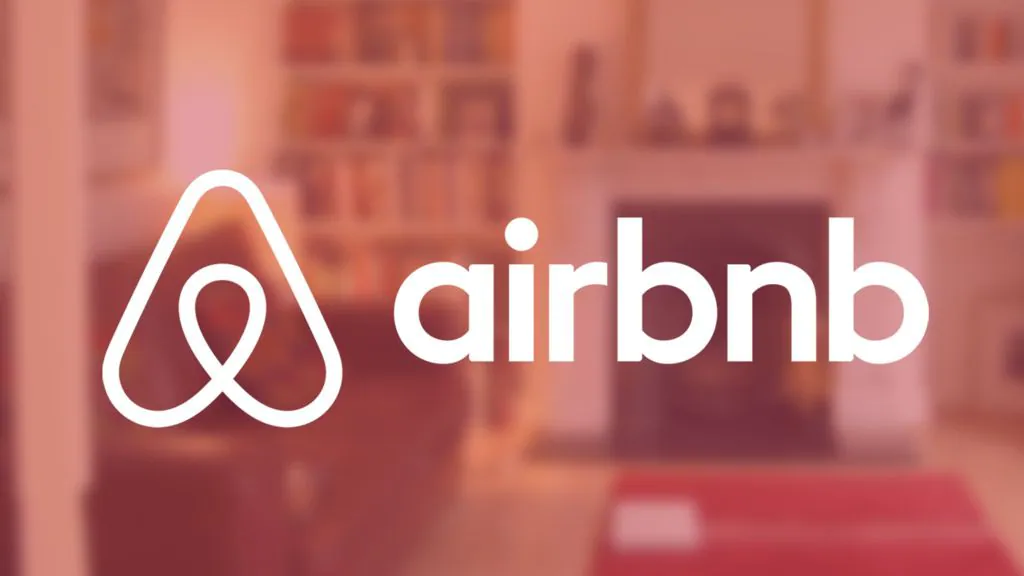

**Neste *notbook*, iremos analisar os dados referente à cidade de New York, e ver quais insights podem ser extraídos a partir de dados brutos.**

OBTENÇÃO DOS DADOS

Todos os dados contidos na análise foram obtidos através do site [Inside Airbnb](https://).

Para esta análise inicial, será baixado apenas o seguinte arquivo:



*   listings.csv - *Sumary Information and Metrics for Listings in New York City (Good for Visualisations)*












In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-04-07/visualisations/listings.csv")

ANÁLISE DOS DADOS

Esta etapa tem a finalidade de construir uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das Variáveis**



*   *id* - número de id gerado para identificar o imóvel
*   *name* - nome da propriedade anunciada
*   *host_id* - número de id do proprietário (anfitrião) da propriedade
*   *host_name* - nome do anfitrião
*   *neighbourhood_group* - esta coluna não contém nenhum valor válido
*   *neighbourhood* - nome do bairro
*   *latitude* - coordenada da latitude da propriedade
*   *longitude* - coordenada da longitude da propriedade
*   *room_type* - informa o tipo de quarto que é oferecido
*   *price* - preço para alugar o imóvel
*   *minimum_nights* - quantidade miníma de noites para reservar
*   *number_of_reviews* - número de reviews que a propriedade possui
*   *last_review* - data do último review
*   *reviews_per_month* - quantidade de reviews por mês
*   *calculated_host_listings_count* - quantidade de imóveis do mesmo anfitrião
*   *avaialability_365* - número de dias de  disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.
















In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.35,3,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,396,2021-03-19,4.98,1,198
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.35,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,7,1,2014-01-02,0.01,1,79
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,79,2,474,2020-09-25,3.26,1,355


**QUESTÃO 1: QUANTOS ATRIBUTOS (VARIÁVEIS) E ENTRADAS O CONJUNTO DE DADOS POSSUI? QUAIS OS TIPOS DAS VARIÁVEIS?**

Adiante vamos identificar a quantidade de entradas que o conjunto de dados possui e os tipos de cada coluna.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

Entradas:	36905
Variáveis:	16



In [ ]:
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**QUESTÃO 2: QUAL A PORCENTAGEM DE VALORES AUSENTES NO *DATASENT*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender se esses valores nulos são significativos comparadas ao total de entradas.

*   É possível ver que a coluna *neightbourhood_group* possui 100% dos valores faltantes.
*   As variáveis *reviews_per_month* e *last_review* possuem valores nulos em metade das linhas.
*   As variáveis *name* e *host_name* tem aproximadamente 0,1% dos valores nulos.







In [ ]:
# ordenar por ordem decrescente as variáveis com valores nulos
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.263379
last_review                       0.263379
host_name                         0.034358
name                              0.000352
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

**QUESTÃO 3: QUAL O TIPO DE DISTRIBUIÇÃO DAS VARIÁVEIS?**

Para demonstrar a distribuição das variáveis, irei plotar o histograma.

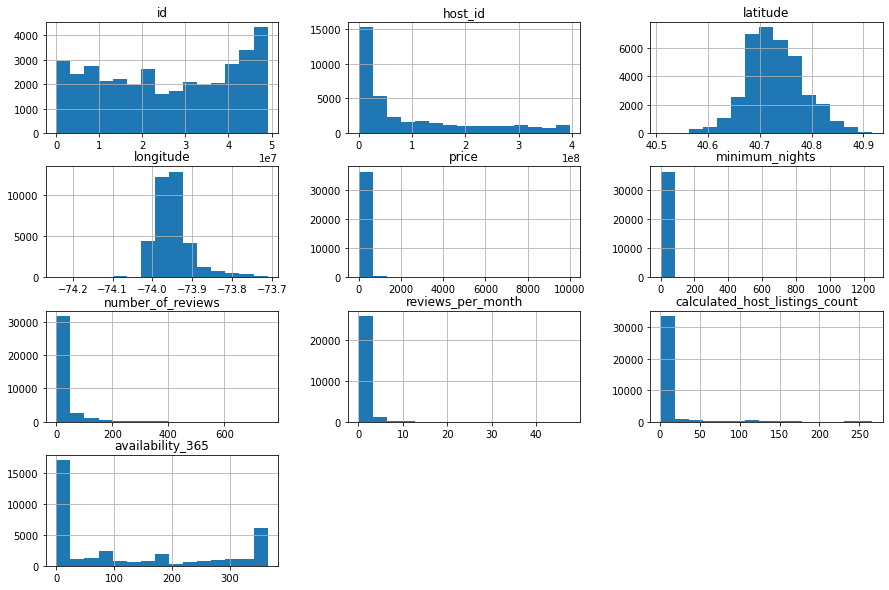

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

**QUESTÃO 4: HÁ *OUTLIERS* PRESENTES?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis *price*, *minimum_nights*, *reviews_per_month* e *calculated_host_listings_count*.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

*   Resumo estatístico por meio do método *describe*
*   Plotar *boxplots* para a variável




In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36905.000000,36905.000000,36905.000000,27185.000000,36905.000000,36905.000000
mean,148.559274,23.123235,22.668636,0.854783,11.071318,123.697087
std,290.379973,26.546473,48.003378,1.349439,36.699390,143.178789
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.100000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.340000,1.000000,54.000000
75%,160.000000,30.000000,20.000000,1.090000,3.000000,269.000000
max,10000.000000,1250.000000,755.000000,47.600000,266.000000,365.000000


Olhando o resumo estatístico acima, podemos identificar algumas hipóteses como:


*   A variável *price* possui 75% do valor abaixo de 160, porém seu valor máximo é 10000.
*   A quantidade *minimum_nights* está acima de 365 dias.



BOXPLOT PARA *MINIMUM_NIGTHS*

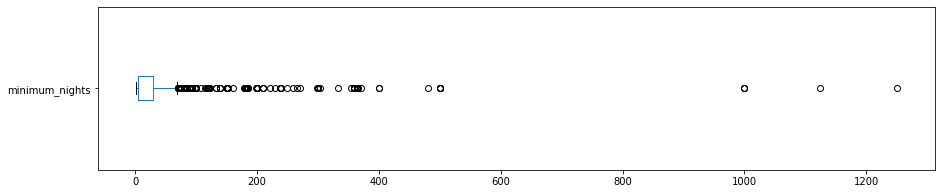

minimum_nigths: valores acima de 40:
765 entradas
2.0729%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 40 dias para minimum_nights
print("minimum_nigths: valores acima de 40:")
print("{} entradas".format(len(df[df.minimum_nights >40])))
print("{:.4f}%".format((len(df[df.minimum_nights >40]) / df.shape[0])*100))


BOXPLOT PARA *PRICE*

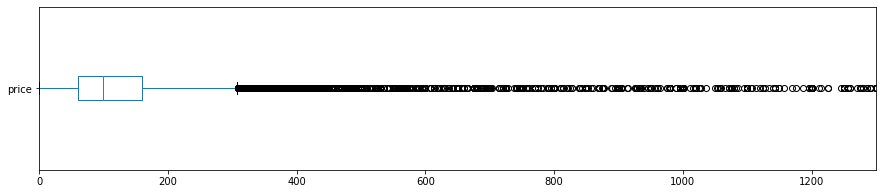


price: valores acima de 1500
120 entradas
0.3252%


In [ ]:
# price
df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15, 3));
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price >1500])))
print("{:.4f}%".format((len(df[df.price >1500]) / df.shape[0])*100))

HISTOGRAMAS SEM *OUTLIERS*

Já que identificamos outliers nas variáveis *minimum_nigths* e *price*, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

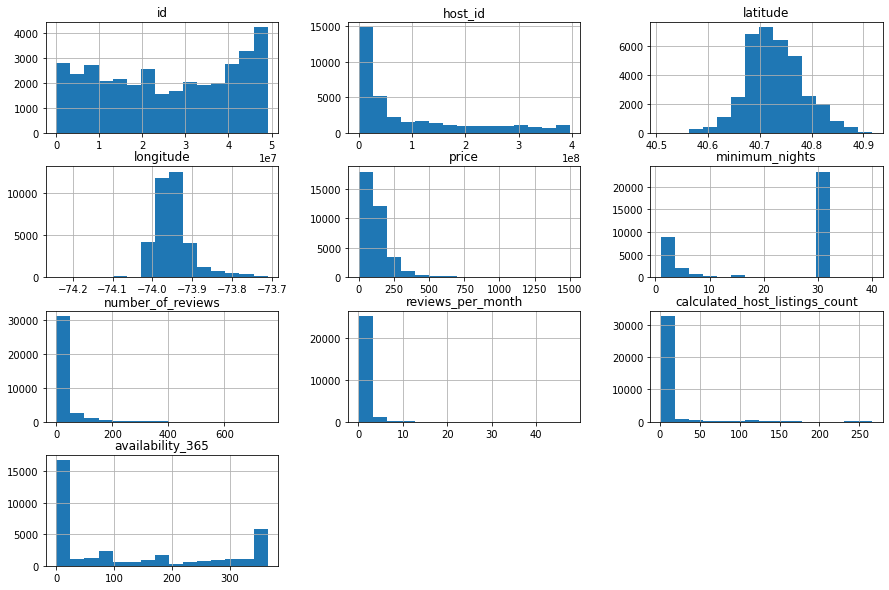

In [ ]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights >40].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price >1500].index, axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

**QUESTÃO 4: QUAL A CORRELAÇÃO ENTRE AS VARIÁVEIS?**

Correlação significa que existe uma relação entre duas coisas. No presente contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca *seaborn*




In [ ]:
# criar uma matriz de correlação 
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.032521,-0.046092,-0.039161,-0.010349,0.058290
minimum_nights,-0.032521,1.000000,-0.255312,-0.395851,0.130259,-0.131506
number_of_reviews,-0.046092,-0.255312,1.000000,0.667383,-0.106988,0.139090
reviews_per_month,-0.039161,-0.395851,0.667383,1.000000,-0.010594,0.193401
calculated_host_listings_count,-0.010349,0.130259,-0.106988,-0.010594,1.000000,0.212550
availability_365,0.058290,-0.131506,0.139090,0.193401,0.212550,1.000000


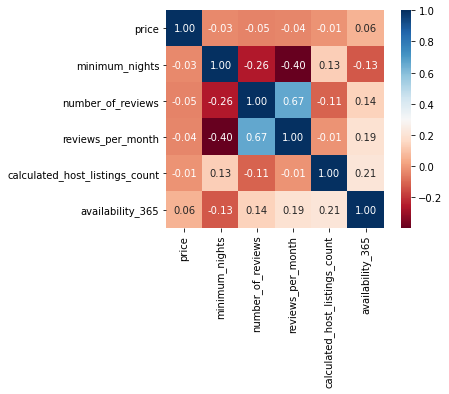

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

**QUESTÃO 5: QUAL O TIPO DE IMÓVEL MAIS ALUGADO NO AIRBNB?**

A coluna da variável *room_type* indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método *value_counts()*.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18654
Private room       16443
Shared room          652
Hotel room           281
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.517735
Private room       0.456370
Shared room        0.018096
Hotel room         0.007799
Name: room_type, dtype: float64

**QUESTÃO 6: QUAL A LOCALIDADE MAIS CARA DE NEW YORK?**

Uma maneira de se verificar uma variável em função da outra é usando *groupby()*. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth       800.000000
Tribeca              371.775758
Tottenville          329.000000
Willowbrook          309.000000
Prince's Bay         290.000000
SoHo                 265.204545
Flatiron District    253.650794
Arverne              241.521127
Theater District     237.903114
DUMBO                232.769231
Name: price, dtype: float64

Acima, vemos que bairros como Fort Wadsworth, Tribeca, Tottenville e Willowbrook, estão com média de preço superior a de lugares como SoHo, Arverne e Theater District.

Uma pessoa que não conhecesse New York poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Fort Wadsworth.

In [ ]:
# ver a quantidade de imóveis no Fort Wadsworth
print(df_clean[df_clean.neighbourhood == "Fort Wadsworth"].shape)

# ver a principal entrada do bairro Fort Wadsworth
df_clean[df_clean.neighbourhood == "Fort Wadsworth"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14882,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,800,30,0,NaN,NaN,6,365


São fornecidas Latitudes e Longitudes para os imóveis, assim é possível plotar cada ponto. Para isso, considera-se *x=longitude* e *y=latitude*.

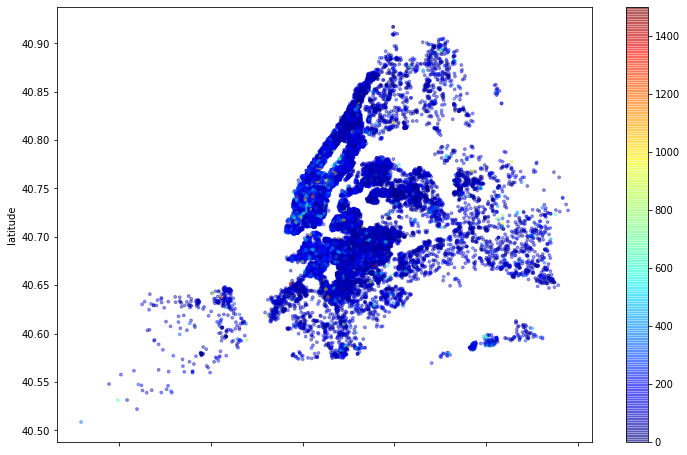

In [ ]:
# plotar os imóveis de acorco com a longitude-latitute
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

**CONCLUSÕES**

Foi realizada apenas uma análise superficial na base de dados do Airbnb, todavia já se percebeu que existem *outliers* em diversas variáveis. 

Ainda, ficou claro que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas retiradas da base de dados.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, a versão completa dos dados, com 106 atributos disponíveis para uma análise mais detalhada.